In [2]:
import numpy as np
import pandas as pd

# **Steps Followed**

1. Create a skeleton class for Network

2. Inherit the skeleton class to make a FCLayer class

3. Activation Layer(tanh)

4. Calculate Loss(mean sq error)

5. Data Exraction and preprocessing part

6. Model Creation n traaining

7. Visualizing Epochs VS Loss graph 

8. Making Prediction

# Parent for FCLayer

In [3]:
#SKELETON
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError
        

**Forward propagation**

*the input data is fed in the forward direction through the network. Each hidden layer accepts the input data, processes it as per the activation function and forwwards it.*

At each neuron in a hidden or output layer, the processing happens in two steps:

    Preactivation: it is a weighted sum of inputs  Based on this sum passed thru activation function the neuron makes a decision whether to pass this information further .
    
    Activation: the calculated weighted sum of inputs is passed to the activation function. examples: — sigmoid, tanh, Relu and Softmax.
    

**BackPropagation**

* after each forward pass through a network, backpropagation performs a backward pass while adjusting the model’s parameters (weights and biases). This is done by reducing parameters by a differential amount which is proportional to the derivative of Cost function wrt that parameter *

# Fully Connected Layer

In [4]:
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5
    ## weight matrix with values b/w -0.5 to 0.5
    
#foreward prop
    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    #just going foreward by adding the linear comnbination of inout*weights+bias and passing it through the activation function(tanh here)

#backprop
    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)  #dE/dX
        weights_error = np.dot(self.input.T, output_error)  #dE/dW
        # dBias = output_error
    
#learning
        # update parameters: w = w - alpha * dw (learning process)
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

###Reference:
https://stackoverflow.com/questions/49545186/generate-random-doubles-between-a-specific-range

* Parameter gets updated by optimizer
* In our case we use Gradient descent 

# Loss and derivative

In [5]:
#loss function and its derivative
def mse(y_true, y_pred): #USING MEAN SQUARE ERROR FOR LOSS FUNCTION
    return(np.mean(np.power(y_true-y_pred, 2)));

def mse_prime(y_true, y_pred):
    return(2*(y_pred-y_true)/y_true.size);

MSE=avg of (y-y_pred)^2

# Activation function and derivative

In [6]:
#USED TANH FOR ACTIVATION

def tanh(x):
    return(np.tanh(x));

def tanh_prime(x): #derivative
    return(1-np.tanh(x)**2);

In [7]:
#inherit from base class(OOP)
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
        
    #return the activation input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return(self.output)
    
    #return input_error = dE/dX for a given output_error=dE/dY
    def backward_propagation(self, output_error, learning_rate):
        return(self.activation_prime(self.input) * output_error)

# Defining complete Network

In [8]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    #add layer to network
    def add(self, layer):
        self.layers.append(layer)

    #set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    #predict output for given input
    def predict(self, input_data):
        #sample dimension
        samples = len(input_data)
        result = []

        #run network over all samples
        for i in range(samples):
            #forward prop
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    #training
    def fit(self, x_train, y_train, epochs, learning_rate):
        #sample dimension
        samples = len(x_train)
        #saving epoch and error in lists
        epoch_list = []
        error_list = []

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                #backprop
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            #average error on sample
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
            
            epoch_list.append(i+1)
            error_list.append(err)
        
            #creating dataframe of epoch and error
            df = pd.DataFrame()
            df['epoch'] = epoch_list
            df['loss'] = error_list
        return df

# Creating dataset for training and preprocessing

In [9]:
from keras.datasets import mnist
from keras.utils import np_utils
#USING MNIST FOR DATABASE

Using TensorFlow backend.


In [10]:
#load MNIST from server
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#training data
#reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0],1,28*28)
x_train = x_train.astype('float32')
x_train /= 255

#ecnoding output
y_train = np_utils.to_categorical(y_train)

#same for test data
x_test = x_test.reshape(x_test.shape[0],1,28*28)
x_test = x_test.astype('float32')
x_test /= 255  #to convert to 0-1 range

#ecnoding output
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 1s 0us/step



#### REFERENCES
https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/ FOR LOSS FUNCTION

https://github.com/hsjeong5/MNIST-for-Numpy FOR DATASET

# Creating Network

In [11]:
#Network
net = Network()
net.add(FCLayer(28*28, 50))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(50, 10))
net.add(ActivationLayer(tanh, tanh_prime))

net.use(mse, mse_prime)

# Training Network

In [12]:
df = net.fit(x_train[:1000], y_train[:1000],epochs=50,learning_rate=0.1)

epoch 1/50   error=0.246070
epoch 2/50   error=0.094799
epoch 3/50   error=0.076477
epoch 4/50   error=0.066538
epoch 5/50   error=0.059922
epoch 6/50   error=0.054874
epoch 7/50   error=0.050583
epoch 8/50   error=0.046779
epoch 9/50   error=0.043586
epoch 10/50   error=0.040814
epoch 11/50   error=0.038403
epoch 12/50   error=0.036374
epoch 13/50   error=0.034595
epoch 14/50   error=0.032957
epoch 15/50   error=0.031416
epoch 16/50   error=0.029992
epoch 17/50   error=0.028712
epoch 18/50   error=0.027542
epoch 19/50   error=0.026448
epoch 20/50   error=0.025411
epoch 21/50   error=0.024437
epoch 22/50   error=0.023504
epoch 23/50   error=0.022577
epoch 24/50   error=0.021644
epoch 25/50   error=0.020720
epoch 26/50   error=0.019911
epoch 27/50   error=0.019214
epoch 28/50   error=0.018600
epoch 29/50   error=0.018064
epoch 30/50   error=0.017589
epoch 31/50   error=0.017156
epoch 32/50   error=0.016756
epoch 33/50   error=0.016384
epoch 34/50   error=0.016033
epoch 35/50   error=0.0

# Visualizing Epoch vs Loss

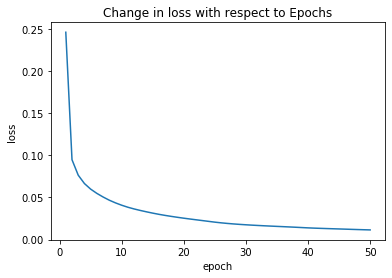

In [13]:
import matplotlib.pyplot as plt
x=df['epoch']
y=df['loss']
plt.plot(x,y)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Change in loss with respect to Epochs')

plt.show()

### Learning curve

# Prediction

In [14]:
#test on 3 samples
out = net.predict(x_test[:1])

print('true values: ')
print(y_test[0:1])

print('\n')
print('predicted values: ')
out_int = [abs(np.round(x)) for x in out]
print(out_int)

true values: 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


predicted values: 
[array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])]
